## Importar bibliotecas

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow import keras
from tensorflow.keras.layers import Dense

## Carregar e preparar os dados

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

In [ ]:
# Trocar a coluna de target de rings para age
## Cada anel equivale a 1 ano e meio do abalone

y['Age'] = y['Rings'].apply(lambda x: x*1.5)
y.drop(columns=['Rings'], inplace=True)

In [ ]:
# Tratar as features categóricas

encoder = OneHotEncoder()
array_sex = encoder.fit_transform(X[['Sex']]).toarray()
df_sex = pd.DataFrame(array_sex, columns=['F', 'I', 'M'])

X.drop('Sex', axis=1, inplace=True)

X = pd.concat([X, df_sex], axis=1)

In [ ]:
RANDOM_SEED = 33
np.random.seed(RANDOM_SEED)

In [ ]:
# Dividir o conjunto de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=RANDOM_SEED)

X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [ ]:
# Normalizar os dados

std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_train, X_test = std_scaler.transform(X_train), std_scaler.transform(X_test)

## Implementando o modelo

In [ ]:
# Definir a arquitetura

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4929 (19.25 KB)
Trainable params: 4929 (19.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=.001), loss='mean_squared_error')

In [ ]:
# Treinar o modelo
model.fit(X_train, y_train, validation_split=.2, epochs=20, batch_size=32)

Epoch 1/20
84/84 [==============================] - 0s 3ms/step - loss: 9.4026 - val_loss: 10.4620
Epoch 2/20
84/84 [==============================] - 0s 2ms/step - loss: 9.3602 - val_loss: 10.0786
Epoch 3/20
84/84 [==============================] - 0s 2ms/step - loss: 9.3760 - val_loss: 10.1809
Epoch 4/20
84/84 [==============================] - 0s 2ms/step - loss: 9.2399 - val_loss: 10.1761
Epoch 5/20
84/84 [==============================] - 0s 2ms/step - loss: 9.3960 - val_loss: 10.3977
Epoch 6/20
84/84 [==============================] - 0s 2ms/step - loss: 9.3815 - val_loss: 10.1596
Epoch 7/20
84/84 [==============================] - 0s 3ms/step - loss: 9.2636 - val_loss: 10.0982
Epoch 8/20
84/84 [==============================] - 0s 3ms/step - loss: 9.2330 - val_loss: 10.0081
Epoch 9/20
84/84 [==============================] - 0s 2ms/step - loss: 9.2801 - val_loss: 10.1285
Epoch 10/20
84/84 [==============================] - 0s 2ms/step - loss: 9.1508 - val_loss: 10.0102
Epoch 11/

In [ ]:
# Avaliar o modelo
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 11.5937


11.593725204467773

In [ ]:
y_pred = model.predict(X_test)

27/27 [==============================] - 0s 1ms/step


27/27 [==============================] - 0s 1ms/step


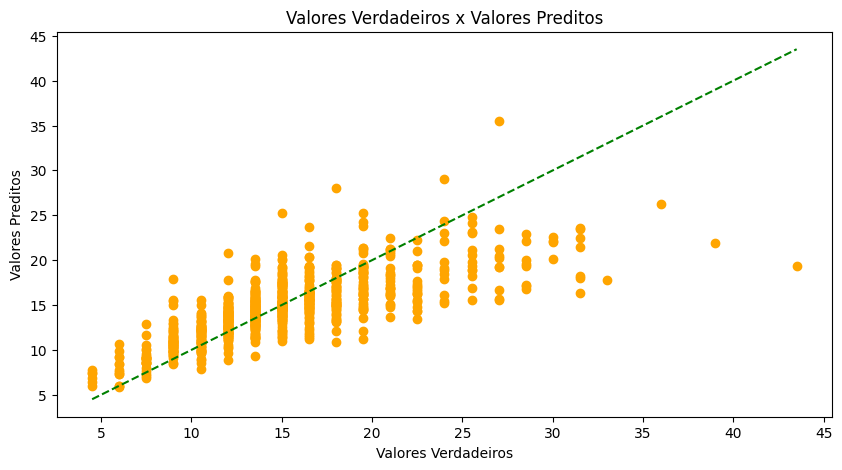

In [ ]:
# Visualização dos resultados

import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='orange', label='Previsões')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='green', linestyle='--', label='Linha ideal')

plt.xlabel('Valores Verdadeiros')
plt.ylabel('Valores Preditos')
plt.title('Valores Verdadeiros x Valores Preditos')
plt.show()

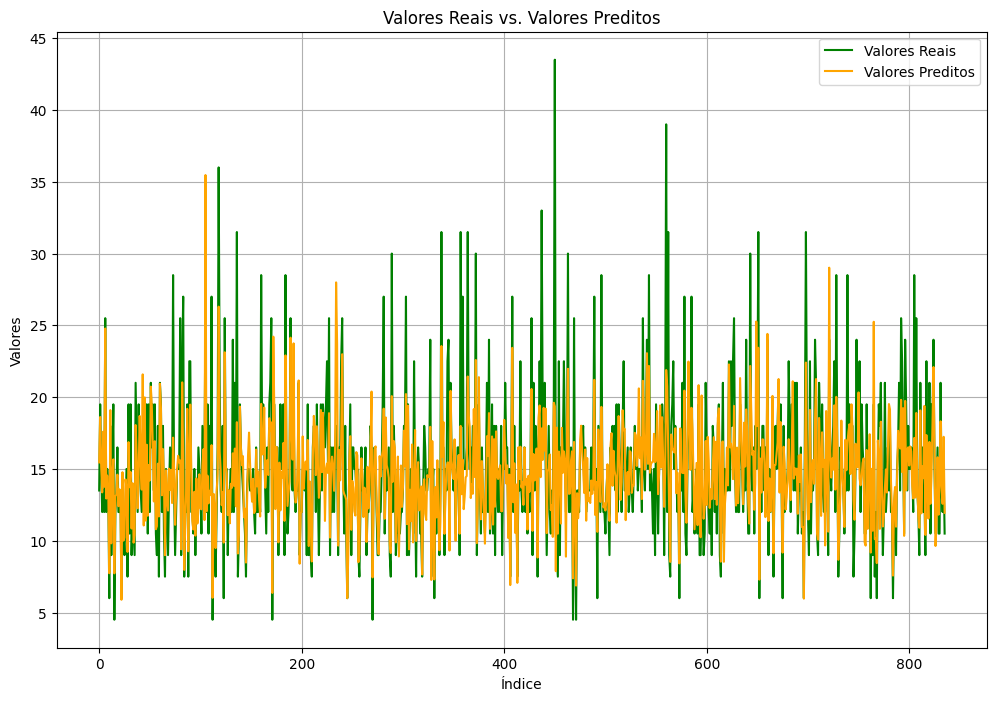

In [ ]:
# Visualização dos resultados

x = np.arange(len(y_test))

plt.figure(figsize=(12, 8))
plt.plot(x, y_test, label='Valores Reais', color='green')
plt.plot(x, y_pred, label='Valores Preditos', color='orange')

plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Valores Reais vs. Valores Preditos')
plt.legend()
plt.grid(True)
plt.show()